In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)


,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [3]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [27]:
x = housing['size'].to_numpy()
x

array([42., 65., 70., ..., 32., 70., 30.])

In [29]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

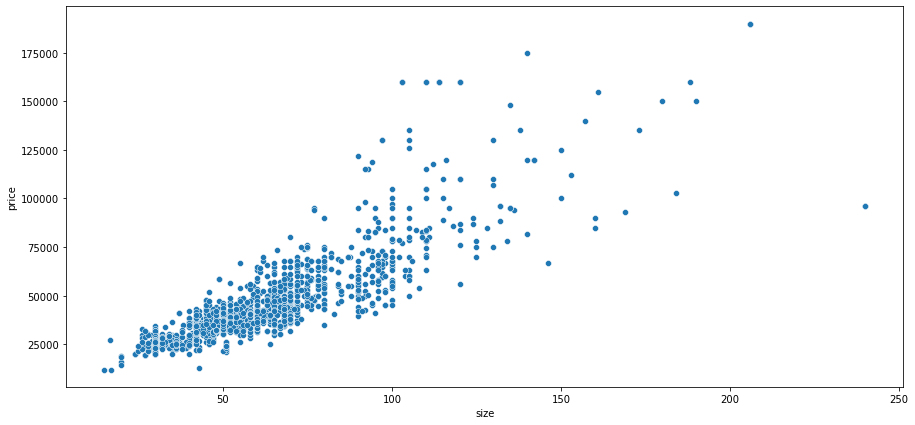

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

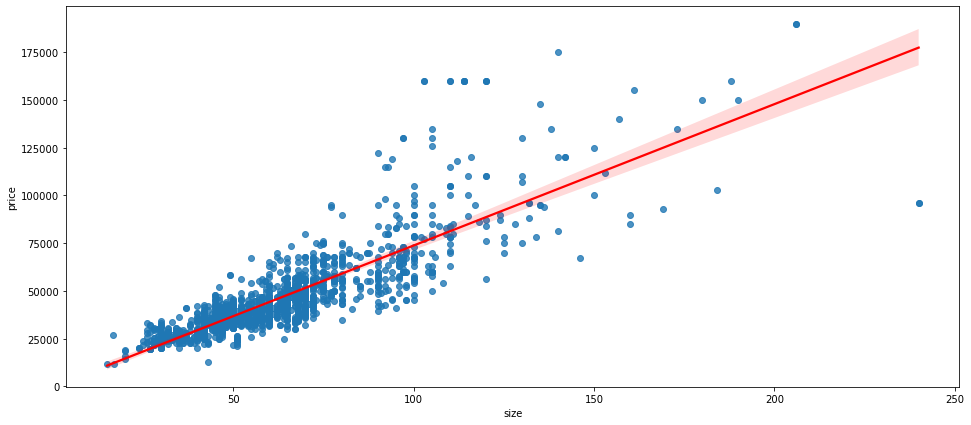

In [10]:
plt.figure(figsize=(16,7))
sns.regplot(data=housing, x='size', y='price', line_kws={'color':'red'})
plt.show()

In [ ]:
# 1-chi 

In [30]:
xmean = np.mean(x)

ymean = np.mean(y)

In [31]:
theta1 = sum((x-xmean)*(y-ymean))/sum((x-xmean)**2)
print(f"{theta1=}")

theta1=740.0264822713287


In [32]:
theta0 = ymean-theta1*xmean
print(f"{theta0=}")

theta0=-195.94911352690542


In [33]:
# 2-chi

In [36]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")

x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])


In [56]:
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")


y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [38]:
y_predict = theta0+theta1*x_test
print(f"{y_predict=}")

y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


In [39]:
#3-chi MAE, RMSE

In [40]:
# MAE

mae = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{mae=}")

mae=4140.35031634715


In [41]:
# RMSE

rmse = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{rmse=}")

rmse=5882.051673173715


In [43]:
# SCIKIT_LEARN yordamida LR

In [42]:
housing.shape

(1616, 6)

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [45]:
# learn regression ml

In [46]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

#modelni tartiblaymiz ( train )

lr_model.fit(x_train, y_train)


LinearRegression()

In [47]:
# theta1 va theta0 koefisentlarni ajratib olamiz

theta1 = lr_model.coef_[0][0]
theta0 = lr_model.intercept_[0]
print(f"{theta1=}")
print(f"{theta0=}")

theta1=732.7784051414766
theta0=106.31843170110369


In [48]:
# theta0 va theta1 qiymatlar yordamida togri chiziq chizamiz

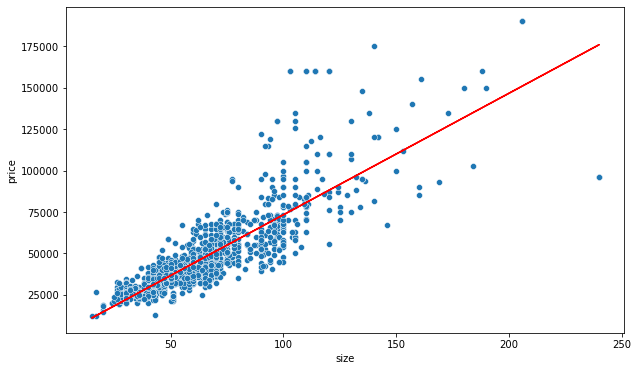

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0,'-r')
plt.xlabel('size')
plt.ylabel('price')
plt.show()

In [51]:
# modelni baholaymiz

In [52]:
x_test = np.asanyarray(test_set[['size']])

y_test = np.asanyarray(test_set[['price']])

In [53]:
y_predict = lr_model.predict(x_test)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_predict)

mrse = mean_squared_error(y_test, y_predict)

print(f"{mae=}")
print(f"{mrse=}")

mae=7269.709648262382
mrse=162175226.50666296
